# Tarea semanal 2

#### Franco Ruggiero

> Dado el siguiente circuito: <center> <img src="image_TS2.png" style="width:600px; height:300px"> <center>

- Hallar la transferencia $T = \frac{V_o}{V_i}$ en función de ωo y Q
- Hallar los parámetros ωo, Q y k

> Desarrollo: <center> <img src="Desarrollo_parte1.jpg" style="width:700px; height:800px"> <center> <center> <img src="Desarrollo_parte2.jpg" style="width:700px; height:800px"> <center>
>
> #### Correcciones:
>> ### $K = -\frac{1}{R_1C}$
>> ## $T_{(s)} = \frac{Kw_0}{s^2+s\frac{w_0}{Q}+w_0^2}$

- Obtener el valor de los componentes para que el circuito se comporte como un Butterworth de 2do orden.
###### Para que el circuito se comporte como un butterworth de $2^{do}$ orden: 
> <center> <img src="PZ.jpg" style="width:300px; height:200px"> <center>


>> ### $\alpha = \frac{\pi}{2n} = \frac{\pi}{4}$ 
>> ### $Q = \frac{1}{2\cos(\alpha)} = \frac{\sqrt[]{2}}{2} = \frac{R_2}{R_3}    \Longrightarrow   R_2 = \frac{\sqrt[]{2}}{2} R_3$
>>
>> Normalizando en impedancia:
>> ### $\Omega_w: w_0 = 1 \Longrightarrow C = \frac{1}{R3}$
>>
>> Adoptando, ademas:
>> ### $R_3 = 2  \longrightarrow R_1 = 1 \longrightarrow R_4 = 1$
>> ## $\longrightarrow R_2 = \sqrt[]{2}$ 	
>> ## $\longrightarrow C = \frac{1}{2}$
>>
>> La trandferencia quedara:
>> ## $T_{B_2(s)} = -\frac{R_3}{R_1} \frac{1}{s^2+s\frac{2}{\sqrt[]{2}}+1} \Longrightarrow T_{B_2(s)} = -2 \frac{1}{s^2+s\frac{2}{\sqrt[]{2}}+1}$
>>
> Simulando:

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

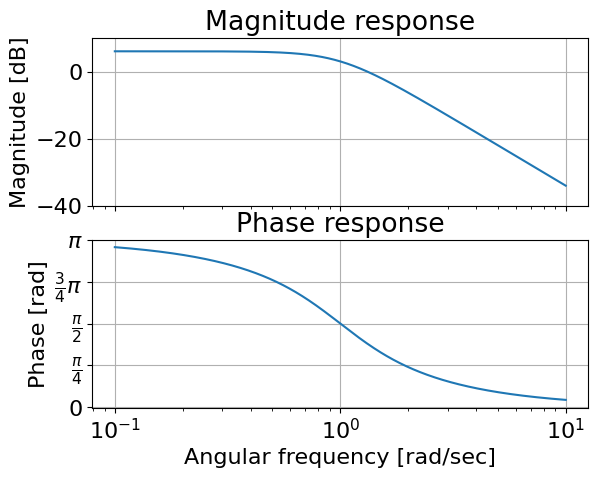

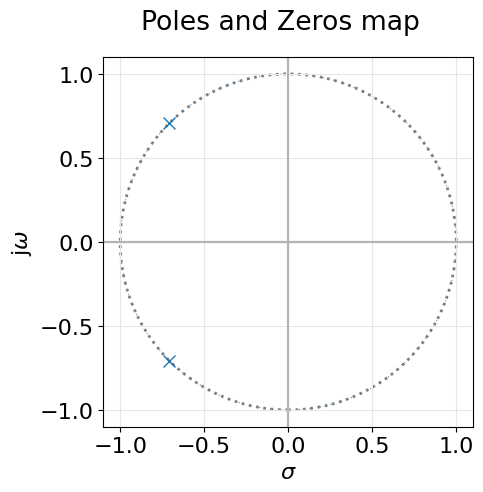

In [46]:
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16


# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys
import matplotlib as mpl
from matplotlib import pyplot as plt
from pytc2.general import print_subtitle
from IPython.display import IFrame

IFrame("./Butterworth 2do orden", width=1000, height=1000)
plt.rcParams.update({'font.size':fig_font_size})

w0 = 1

# Cargamos la funcion transferencia como vectores de sus coeficientes.
num = np.array([ -2 ])
den = np.array([ 1 , 2/np.sqrt(2) , 1])
H1 = sig.TransferFunction( num, den )

plt.close('all')
# Graficamos la respuesta en frecuencia para el modulo y la fase.
_, axs = bodePlot(H1)

#ajustamos la escala del eje "y" del grafico
axs[0].set_ylim(-40, 10) 

# Graficamos el diagrama de polos y ceros
pzmap(H1)

> Simulacion en LTSpice:
>
> <center> <img src="Draft_ButterOrden2.png" style="width:600px; height:350px"> <center>
>
> <center> <img src="Sim_ButterOrden2.png" style="width:800px; height:350px"> <center>


- Cómo podría obtener un filtro pasabajo Butterworth de 4to orden, a partir de un prototipo basado en este circuito, y que cumpla con |T(0)|=20dB

###### Para obtener un circuito que se comporte como un butterworth de $4^{to}$ orden: 
> <center> <img src="PZ4.jpg" style="width:300px; height:200px"> <center>
>

>> ### $\alpha_1 = \frac{\pi}{2n} = \frac{\pi}{8}$
>> ### $\alpha_2 = \frac{\pi}{2n} + \frac{\pi}{n} = \frac{3}{8}\pi$ 
>> ## $Q_1 = \frac{1}{2\cos(\frac{\pi}{8})} = \frac{\dot{R_2}}{\dot{R_3}}$
>> ## $Q_2 = \frac{1}{2\cos(\frac{3}{8}\pi)} = \frac{\ddot{R_2}}{\ddot{R_3}}$
>>
>> Como $|T_{(0)}| = 20dB \longrightarrow |T_{(0)}| = 10 $:
>> ### $|T_{(0)}| = 10 = \frac{R_3}{R_1} \Longrightarrow R_3 = 10 R_1$
>>
>> Luego teniendo en cuenta las siguientes "relaciones" previamente calculadas, se procedera a adoptar valores para sus componentes:
>>## $\left\{\begin{array}{l} Q_1 = \frac{1}{2\cos(\frac{\pi}{8})} = \frac{\dot{R_2}}{\dot{R_3}} \\ Q_2 = \frac{1}{2\cos(\frac{3}{8}\pi)} = \frac{\ddot{R_2}}{\ddot{R_3}} \\ R_3 = 10 R_1 \end{array}\right.$
>>
>> 
>> En donde el conexionado entre los dos butterworth de $2^{do}$ orden sera:
>> 
>> <center> <img src="BW4.jpg" style="width:700px; height:200px"> <center>
>>
>> En este caso, al ser redes activas, no haria falta el buffer que las vincula